# Make Logbook of Trim images of CTIO Data
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS, France
- date   : Jult 4th 2017



In [46]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [47]:
print(theNotebook)

MakeLogBook


In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
from astropy.table import Table, Column
import re
import os

In [49]:
import pandas as pd

In [50]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Location of trim images
----------------------------------

In [51]:
!ls

AnaCompareDataSimSpec.ipynb
AnaEqWdtCalibSpectrum.ipynb
CalibrateSpectrum.ipynb
Extract_Spectrum.ipynb
FindCentralStar.ipynb
FindCentralStarFast.ipynb
FindOptRot.ipynb
GenerateSimulationProfiles.ipynb
MakeLogBook.ipynb
ReduceAllImages.ipynb
ReduceAllImages_rejectHD160617.ipynb
ViewAllImages.ipynb
cut_fitsimages
images_notebooks
logbk_HD185975_HD205905 June 10th_ctio10jun2017.csv
logbk_HD185975_HD205905 June 10th_ctio10jun2017.fits
processed_fitsimages
reduced_fitsimages
rotated_fitsimages
spectrum_fitsspec


In [70]:
#rootpath_rawimage="../OverScanRemove/trim_images"
rootpath_rawimage="./reduced_fitsimages"
MIN_IMGNUMBER=135
MAX_IMGNUMBER=303
object_name='HD185975_HD205905 June 10th'
SelectTagRe='^reduc_20170610_([0-9]+).fits$' # regular expression to select the file
SearchTagRe='^reduc_20170610_[0-9]+.fits$'
NBIMGPERLROW=4

In [71]:
#rootpath_rawimage="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/November2016/mucol"
#object_name='mucol'
infos='ctio10jun2017'

In [54]:
logfile='logbk_'+object_name+'_'+infos+'.fits'
pandaslogfile='logbk_'+object_name+'_'+infos+'.csv'

In [72]:
dirlist=[]
dirlist.append(rootpath_rawimage)
dirlist_all=np.array(dirlist)

In [73]:
filelist_all=os.listdir(rootpath_rawimage) 

In [74]:
#dirlist_all.remove('.DS_Store') # reove that file in a mAC
filelist_all

['reduc_20170610_139.fits',
 'reduc_20170610_140.fits',
 'reduc_20170610_141.fits',
 'reduc_20170610_142.fits',
 'reduc_20170610_143.fits',
 'reduc_20170610_144.fits',
 'reduc_20170610_145.fits',
 'reduc_20170610_146.fits',
 'reduc_20170610_151.fits',
 'reduc_20170610_152.fits',
 'reduc_20170610_153.fits',
 'reduc_20170610_154.fits',
 'reduc_20170610_155.fits',
 'reduc_20170610_156.fits',
 'reduc_20170610_157.fits',
 'reduc_20170610_158.fits',
 'reduc_20170610_163.fits',
 'reduc_20170610_164.fits',
 'reduc_20170610_165.fits',
 'reduc_20170610_166.fits',
 'reduc_20170610_167.fits',
 'reduc_20170610_168.fits',
 'reduc_20170610_169.fits',
 'reduc_20170610_170.fits',
 'reduc_20170610_175.fits',
 'reduc_20170610_176.fits',
 'reduc_20170610_177.fits',
 'reduc_20170610_178.fits',
 'reduc_20170610_179.fits',
 'reduc_20170610_180.fits',
 'reduc_20170610_181.fits',
 'reduc_20170610_182.fits',
 'reduc_20170610_187.fits',
 'reduc_20170610_188.fits',
 'reduc_20170610_189.fits',
 'reduc_20170610_190

In [75]:
indexes_files= [] # global list
filelist_fitsimages= []  # global list

In [59]:
def MakeFileList():
    """
    MakeFileList : Make The List of files to open
    =============
    
    - we select the files which are of interest.
    - In particular select the number range
    
    """
    count=0
    
    for dir in dirlist_all: # loop on directories, one per image   (if necessary)    
            dir_leaf= dir # build the name of leaf directory
            listfiles=os.listdir(dir_leaf) 
            for filename in listfiles:
                if re.search(SearchTagRe,filename):  #example of filename filter
                    str_index=re.findall(SelectTagRe,filename)
                    count=count+1
                    index=int(str_index[0])
                    if index >= MIN_IMGNUMBER and index <= MAX_IMGNUMBER: 
                        indexes_files.append(index)         
                        shortfilename=dir_leaf+'/'+filename
                        filelist_fitsimages.append(shortfilename)
                    
    return

In [76]:
MakeFileList()   # Make the list

In [77]:
indexes_files=np.array(indexes_files)
filelist_fitsimages=np.array(filelist_fitsimages)

In [79]:
indexes_files

array([139, 140, 141, 142, 143, 144, 145, 146, 151, 152, 153, 154, 155,
       156, 157, 158, 163, 164, 165, 166, 167, 168, 169, 170, 175, 176,
       177, 178, 179, 180, 181, 182, 187, 188, 189, 190, 191, 192, 193,
       194, 199, 200, 201, 202, 203, 204, 205, 206, 211, 212, 213, 214,
       215, 216, 217, 218, 223, 224, 225, 226, 227, 228, 229, 230, 235,
       236, 237, 238, 239, 240, 241, 242, 247, 248, 249, 250, 251, 252,
       253, 254, 259, 260, 261, 262, 263, 264, 265, 266, 271, 272, 273,
       274, 275, 276, 277, 278, 283, 284, 285, 286, 287, 288, 289, 290,
       295, 296, 297, 298, 299, 300, 301, 302])

In [80]:
sorted_indexes=np.argsort(indexes_files) # sort the file indexes

In [81]:
sorted_files=filelist_fitsimages[sorted_indexes]

In [82]:
sorted_numbers=indexes_files[sorted_indexes]

In [83]:
sorted_filenames=[]
for file in sorted_files:
    #fullfilename=os.path.join(rootpath_rawimage,file)
    fullfilename=file
    sorted_filenames.append(fullfilename)

In [84]:
sorted_filenames=np.array(sorted_filenames)

In [85]:
sorted_filenames

array(['./reduced_fitsimages/reduc_20170610_139.fits',
       './reduced_fitsimages/reduc_20170610_140.fits',
       './reduced_fitsimages/reduc_20170610_141.fits',
       './reduced_fitsimages/reduc_20170610_142.fits',
       './reduced_fitsimages/reduc_20170610_143.fits',
       './reduced_fitsimages/reduc_20170610_144.fits',
       './reduced_fitsimages/reduc_20170610_145.fits',
       './reduced_fitsimages/reduc_20170610_146.fits',
       './reduced_fitsimages/reduc_20170610_151.fits',
       './reduced_fitsimages/reduc_20170610_152.fits',
       './reduced_fitsimages/reduc_20170610_153.fits',
       './reduced_fitsimages/reduc_20170610_154.fits',
       './reduced_fitsimages/reduc_20170610_155.fits',
       './reduced_fitsimages/reduc_20170610_156.fits',
       './reduced_fitsimages/reduc_20170610_157.fits',
       './reduced_fitsimages/reduc_20170610_158.fits',
       './reduced_fitsimages/reduc_20170610_163.fits',
       './reduced_fitsimages/reduc_20170610_164.fits',
       './

In [86]:
from astropy.io import fits
with fits.open(sorted_filenames[0]) as pf:
    (pf[0].header)

In [87]:
pf[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBJECT  = 'HD185975'           / Name of object observed                        
OBSERVER= '        '           / observer                                       
PROPID  = '        '           / Proposal ID                                    
RECID   = 'ct36.20170611.053406' / NOAO Archibe record ID                       
PROPID  = '        '           / Proposal ID                                    
IMAGETYP= 'object  '        

### Build tables for output file

In [88]:
all_headers = []
all_dates = []
all_airmass = []
all_exposures = []
all_ut = []
all_ra = []
all_dec = []
all_epoch = []
all_zenith = []
all_ha = []
all_st = []
all_alt = []
all_focus = []
all_temp = []
all_press = []
all_hum = []
all_windsp = []
all_seeing = []
all_seeingam = []
all_filter1 = []
all_filter2 = []
all_object = []

for idx,file in np.ndenumerate(sorted_filenames):  
    print file
    hdu_list=fits.open(file)
    header=hdu_list[0].header
    date_obs = header['DATE-OBS']
    airmass = float(header['AIRMASS'])
    expo= float(header['EXPTIME'])
    num=indexes_files[idx[0]]
    obj=header['OBJECT']   
    ut=header['UT']
    ra=header['RA']
    dec=header['DEC']
    epoch=float(header['EPOCH'])
    zd = float(header['ZD'])
    ha = header['HA']
    st = header['ST']
    alt = float(header['ALT'])
    fcl = float(header['TELFOCUS'])
    temp= float(header['OUTTEMP'])
    press= float(header['OUTPRESS'])
    hum= float(header['OUTHUM'])
    windsp=float(header['WNDSPEED'])
    seeing=float(header['SEEING'])
    seeingam=float(header['SAIRMASS'])
    filter1 = header['FILTER1']
    filter2 = header['FILTER2']
    
    all_dates.append(date_obs)
    all_airmass.append(airmass)
    all_headers.append(header)
    all_exposures.append(expo)
    all_ut.append(ut)
    all_ra.append(ra)
    all_dec.append(dec)
    all_epoch.append(epoch)
    all_zenith.append(zd)
    all_ha.append(ha)
    all_st.append(st)
    all_alt.append(alt)
    all_focus.append(fcl)
    all_temp.append(temp)
    all_press.append(press)
    all_hum.append(hum)
    all_windsp.append(windsp)
    all_seeing.append(seeing)
    all_seeingam.append(seeingam)
    all_filter1.append(filter1)
    all_filter2.append(filter2)
    all_object.append(obj)

    hdu_list.close()
    

./reduced_fitsimages/reduc_20170610_139.fits
./reduced_fitsimages/reduc_20170610_140.fits
./reduced_fitsimages/reduc_20170610_141.fits
./reduced_fitsimages/reduc_20170610_142.fits
./reduced_fitsimages/reduc_20170610_143.fits
./reduced_fitsimages/reduc_20170610_144.fits
./reduced_fitsimages/reduc_20170610_145.fits
./reduced_fitsimages/reduc_20170610_146.fits
./reduced_fitsimages/reduc_20170610_151.fits
./reduced_fitsimages/reduc_20170610_152.fits
./reduced_fitsimages/reduc_20170610_153.fits
./reduced_fitsimages/reduc_20170610_154.fits
./reduced_fitsimages/reduc_20170610_155.fits
./reduced_fitsimages/reduc_20170610_156.fits
./reduced_fitsimages/reduc_20170610_157.fits
./reduced_fitsimages/reduc_20170610_158.fits
./reduced_fitsimages/reduc_20170610_163.fits
./reduced_fitsimages/reduc_20170610_164.fits
./reduced_fitsimages/reduc_20170610_165.fits
./reduced_fitsimages/reduc_20170610_166.fits
./reduced_fitsimages/reduc_20170610_167.fits
./reduced_fitsimages/reduc_20170610_168.fits
./reduced_

In [89]:
len(all_airmass)

112

In [90]:
print all_filter1

['RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 'RG715', 

In [91]:
print all_object

['HD185975', 'HD185975', 'HD185975', 'HD185975', 'HD205905', 'HD205905', 'HD205905', 'HD205905', 'HD185975', 'HD185975', 'HD185975', 'HD185975', 'HD205905', 'HD205905', 'HD205905', 'HD205905', 'HD185975', 'HD185975', 'HD185975', 'HD185975', 'HD205905', 'HD205905', 'HD205905', 'HD205905', 'HD185975', 'HD185975', 'HD185975', 'HD185975', 'HD205905', 'HD205905', 'HD205905', 'HD205905', 'HD185975', 'HD185975', 'HD185975', 'HD185975', 'HD205905', 'HD205905', 'HD205905', 'HD205905', 'HD185975', 'HD185975', 'HD185975', 'HD185975', 'HD205905', 'HD205905', 'HD205905', 'HD205905', 'HD185975', 'HD185975', 'HD185975', 'HD185975', 'HD205905', 'HD205905', 'HD205905', 'HD205905', 'HD185975', 'HD185975', 'HD185975', 'HD185975', 'HD205905', 'HD205905', 'HD205905', 'HD205905', 'HD185975', 'HD185975', 'HD185975', 'HD185975', 'HD205905', 'HD205905', 'HD205905', 'HD205905', 'HD185975', 'HD185975', 'HD185975', 'HD185975', 'HD205905', 'HD205905', 'HD205905', 'HD205905', 'HD185975', 'HD185975', 'HD185975', 'HD

## Build outputfile

In [92]:
col_airmass=np.array(all_airmass)
col_number=np.array(indexes_files)
col_date=np.array(all_dates)
col_filename=np.array(filelist_all)
col_exposure=np.array(all_exposures)
col_zenith=np.array(all_zenith)
col_altitude=np.array(all_alt)
col_temperature=np.array(all_temp)
col_pressure=np.array(all_press)
col_humidity=np.array(all_hum)
col_windsp=np.array(all_windsp)
col_seeing=np.array(all_seeing)
col_filter1=np.array(all_filter1)
col_filter2=np.array(all_filter2)
col_obj=np.array(all_object)

In [93]:
c1 = fits.Column(name='number', format='J', array=col_number)
c2 = fits.Column(name='airmass', format='E', array=col_airmass)
c3 = fits.Column(name='date', format='A50', array=col_date)
c4 = fits.Column(name='filename', format='A30', array=sorted_filenames)
c5 = fits.Column(name='exposure', format='E', array=col_exposure) 
c6 = fits.Column(name='zenith', format='E', array=col_zenith) 
#c7 = fits.Column(name='altitude', format='E', array=col_altitude) 
c8 = fits.Column(name='temperature', format='E', array=col_temperature) 
c9 = fits.Column(name='pressure', format='E', array=col_pressure) 
c10 = fits.Column(name='humidity', format='E', array=col_humidity) 
c11 = fits.Column(name='windspeed', format='E', array=col_windsp) 
c12 = fits.Column(name='seeing', format='E', array=col_seeing) 
c13 = fits.Column(name='filter1', format='A20', array=col_filter1)
c14 = fits.Column(name='filter2', format='A20', array=col_filter2) 
c15 = fits.Column(name='object', format='A20', array=col_obj) 

In [94]:
tbhdu = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5,c6,c8,c9,c10,c11,c12,c13,c14,c15])

In [95]:
tbhdu.writeto(logfile,overwrite=True)

## Convert into Table
---------------------------

In [96]:
thetable= Table(tbhdu.data)

In [97]:
thetable.show_in_notebook()

idx,number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing,filter1,filter2,object
0,139,1.874,2017-06-11T05:34:06.396,./reduced_fitsimages/reduc_201,30.0,57.824,13.5,778.0,23.0,17.4,0.712,RG715,Thor300,HD185975
1,140,1.873,2017-06-11T05:35:28.909,./reduced_fitsimages/reduc_201,30.0,57.816,13.5,778.0,23.0,13.2,0.62,RG715,HoloPhP,HD185975
2,141,1.873,2017-06-11T05:36:54.407,./reduced_fitsimages/reduc_201,60.0,57.818,13.6,778.0,22.0,15.2,0.639,RG715,HoloPhAg,HD185975
3,142,1.873,2017-06-11T05:38:47.099,./reduced_fitsimages/reduc_201,60.0,57.806,13.6,778.0,22.0,16.4,0.747,RG715,HoloAmAg,HD185975
4,143,1.393,2017-06-11T05:41:15.751,./reduced_fitsimages/reduc_201,30.0,44.189,13.4,778.0,22.0,13.1,0.717,RG715,Thor300,HD205905
5,144,1.387,2017-06-11T05:42:38.303,./reduced_fitsimages/reduc_201,30.0,43.895,13.4,778.0,23.0,15.0,0.717,RG715,HoloPhP,HD205905
6,145,1.38,2017-06-11T05:44:02.998,./reduced_fitsimages/reduc_201,60.0,43.601,13.5,778.0,22.0,15.1,0.81,RG715,HoloPhAg,HD205905
7,146,1.371,2017-06-11T05:45:55.408,./reduced_fitsimages/reduc_201,60.0,43.2,13.5,778.0,22.0,14.1,0.708,RG715,HoloAmAg,HD205905
8,151,1.867,2017-06-11T05:55:26.453,./reduced_fitsimages/reduc_201,30.0,57.696,13.2,779.0,23.0,15.4,0.818,RG715,Thor300,HD185975
9,152,1.867,2017-06-11T05:56:49.004,./reduced_fitsimages/reduc_201,30.0,57.688,13.1,778.0,23.0,14.0,0.73,RG715,HoloPhP,HD185975


## Read the logfile into a Table
---------------------------------------

In [98]:
print logfile

logbk_HD185975_HD205905 June 10th_ctio10jun2017.fits


In [99]:
t = Table.read(logfile)

In [100]:
t

number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing,filter1,filter2,object
int32,float32,str50,str30,float32,float32,float32,float32,float32,float32,float32,str20,str20,str20
139,1.874,2017-06-11T05:34:06.396,./reduced_fitsimages/reduc_201,30.0,57.824,13.5,778.0,23.0,17.4,0.712,RG715,Thor300,HD185975
140,1.873,2017-06-11T05:35:28.909,./reduced_fitsimages/reduc_201,30.0,57.816,13.5,778.0,23.0,13.2,0.62,RG715,HoloPhP,HD185975
141,1.873,2017-06-11T05:36:54.407,./reduced_fitsimages/reduc_201,60.0,57.818,13.6,778.0,22.0,15.2,0.639,RG715,HoloPhAg,HD185975
142,1.873,2017-06-11T05:38:47.099,./reduced_fitsimages/reduc_201,60.0,57.806,13.6,778.0,22.0,16.4,0.747,RG715,HoloAmAg,HD185975
143,1.393,2017-06-11T05:41:15.751,./reduced_fitsimages/reduc_201,30.0,44.189,13.4,778.0,22.0,13.1,0.717,RG715,Thor300,HD205905
144,1.387,2017-06-11T05:42:38.303,./reduced_fitsimages/reduc_201,30.0,43.895,13.4,778.0,23.0,15.0,0.717,RG715,HoloPhP,HD205905
145,1.38,2017-06-11T05:44:02.998,./reduced_fitsimages/reduc_201,60.0,43.601,13.5,778.0,22.0,15.1,0.81,RG715,HoloPhAg,HD205905
146,1.371,2017-06-11T05:45:55.408,./reduced_fitsimages/reduc_201,60.0,43.2,13.5,778.0,22.0,14.1,0.708,RG715,HoloAmAg,HD205905
151,1.867,2017-06-11T05:55:26.453,./reduced_fitsimages/reduc_201,30.0,57.696,13.2,779.0,23.0,15.4,0.818,RG715,Thor300,HD185975


## Convert into pandas to plot
---------------------------------------

In [101]:
df = t.to_pandas()

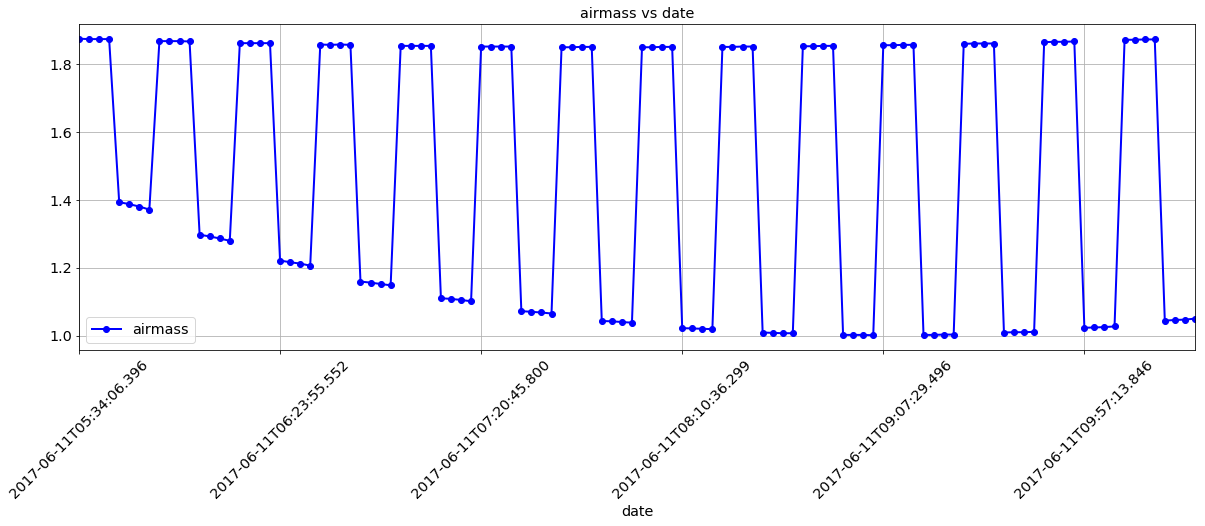

In [102]:
df.plot('date','airmass',figsize=(20,6),rot=45,grid=True,title='airmass vs date',color='b',marker='o',linewidth=2)


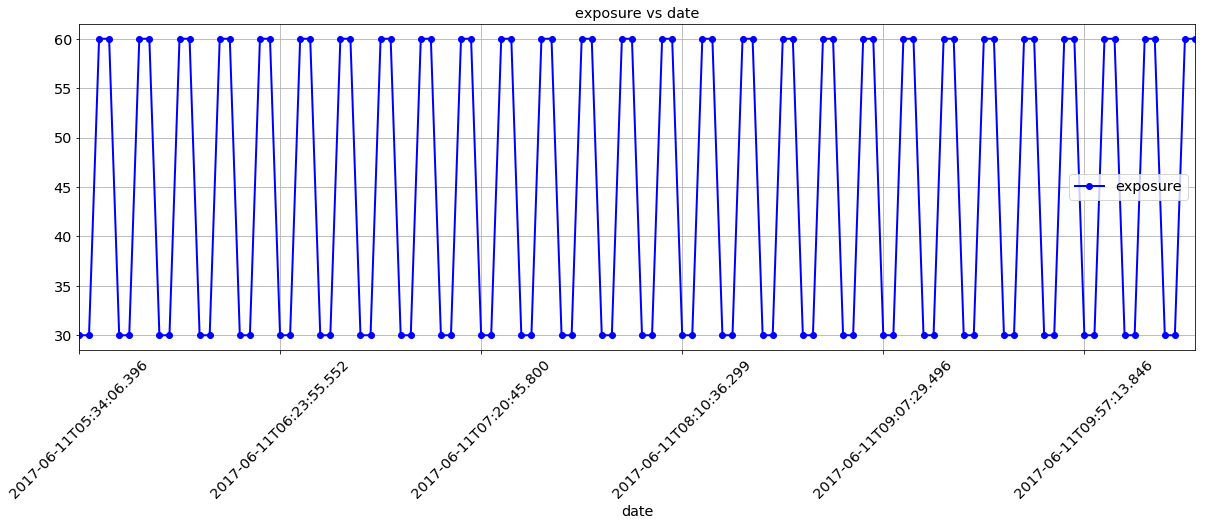

In [103]:
df.plot('date','exposure',figsize=(20,6),rot=45,grid=True,title='exposure vs date',color='b',marker='o',linewidth=2)

### Save pandas file


In [104]:
df.to_csv(pandaslogfile)